# import libraries

In [198]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
from helpers import parse_variables, get_risk_level, map_to_color

In [199]:
possible_scenarios = ['snp_effect',
             'linear_continuous',
             'non_linear_continuous',
             'discrete_global',
             'discrete_localized',
             'mix_linear_continuous',
             'mix_non_linear_continuous',
             'mix_discrete_global',
             'mix_discrete_localized']

In [200]:
scenarios = [f for f in os.listdir(f"data") if f in possible_scenarios]
scenarios

['non_linear_continuous',
 'discrete_global',
 'snp_effect',
 'discrete_localized',
 'linear_continuous']

In [201]:
chosen_scenario = scenarios[3]

In [202]:
folders = [f for f in os.listdir(f"data/{chosen_scenario}") if f.startswith('G')]
folders

['G20_L20_c50_k3_M0.9_HWE1',
 'G20_L20_c50_k3_M0.1_HWE1',
 'G20_L20_c50_k2_M0.1_HWE1',
 'G20_L20_c50_k2_M0.9_HWE1']

In [203]:
dfs = []
for folder in folders:
    scenarios = os.listdir(f"data/{chosen_scenario}/{folder}/pvals")
    for scenario in scenarios:
        risk = scenario.split('P_vals_risk_')[1].split('_noise_')[0]
        env_noise = scenario.split('_envnoise_')[1].split('_causalnoise_')[0]
        causal_noise = scenario.split('_causalnoise_')[1].split('_ratioeffect_')[0]
        ratio_effect = scenario.split('_ratioeffect_')[1].split('.pkl')[0]
        temp =pd.read_pickle(f"data/{chosen_scenario}/{folder}/pvals/{scenario}")
        computing_time = pd.read_pickle(f"data/{chosen_scenario}/complete_geno_{folder}_{causal_noise}_computingtimes.pkl")
        for tool in list(computing_time['tools']):
                result = computing_time.loc[computing_time['tools'] == tool, scenario.split('P_vals_')[1].split('.pkl')[0]].values[0]
                temp[f"time_{tool}"] = result
                temp['params'] = folder
                temp['risk'] = risk
                temp['causal_noise'] = causal_noise
                temp['env_noise'] = env_noise
                temp['ratio_effect'] = ratio_effect
        dfs.append(temp)

In [204]:
concatenated_df = pd.concat(dfs, ignore_index=True)
concatenated_df

,snp,coefs,AFs,-logP_best_corr,-logP_no_corr,-logP_abyss_via_true_pops,-logP_PCs,-logP_abyss_pq2pq_via_esti_pops,-logP_combined,time_best_corr,params,risk,causal_noise,env_noise,ratio_effect,time_no_corr,time_abyss_via_true_pops,time_PCs,time_abyss_pq2pq_via_esti_pops,time_combined
0,CG3,-0.004725,0.45222222222222225,0.083221,0.631567,0.048064,0.562064,0.522573,0.794441,0.828,G20_L20_c50_k3_M0.9_HWE1,three_square_risk_envnoise_0.1_causalnoise_0.0...,0.01,0.1,0,0.451,0.900,0.935,1397.867,1398.211
1,CG14,-0.020810,0.25333333333333335,0.428599,1.100163,0.070631,0.719387,0.756029,0.229548,0.828,G20_L20_c50_k3_M0.9_HWE1,three_square_risk_envnoise_0.1_causalnoise_0.0...,0.01,0.1,0,0.451,0.900,0.935,1397.867,1398.211
2,CG20,-0.045557,0.3977777777777778,1.535913,5.103042,0.270484,0.747232,1.520769,0.900978,0.828,G20_L20_c50_k3_M0.9_HWE1,three_square_risk_envnoise_0.1_causalnoise_0.0...,0.01,0.1,0,0.451,0.900,0.935,1397.867,1398.211
3,CG31,0.002199,0.26,0.031710,6.505627,0.056930,0.154764,2.510558,1.324675,0.828,G20_L20_c50_k3_M0.9_HWE1,three_square_risk_envnoise_0.1_causalnoise_0.0...,0.01,0.1,0,0.451,0.900,0.935,1397.867,1398.211
4,CG33,0.017349,0.39222222222222225,0.375788,0.325927,0.075563,1.966212,0.847811,1.711358,0.828,G20_L20_c50_k3_M0.9_HWE1,three_square_risk_envnoise_0.1_causalnoise_0.0...,0.01,0.1,0,0.451,0.900,0.935,1397.867,1398.211
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8179,VRG165,0.441377,0.0475,1.271504,1.271504,1.358134,1.190394,1.541455,1.671998,0.717,G20_L20_c50_k2_M0.9_HWE1,hi_square_risk_envnoise_0.5_causalnoise_0.9_ra...,0.9,0.5,0,0.440,0.644,0.856,689.635,689.983
8180,VRG173,0.013705,0.04,0.019729,0.019729,0.046417,0.279097,0.224735,0.014026,0.717,G20_L20_c50_k2_M0.9_HWE1,hi_square_risk_envnoise_0.5_causalnoise_0.9_ra...,0.9,0.5,0,0.440,0.644,0.856,689.635,689.983
8181,VRG174,-0.160665,0.045,0.306789,0.306789,0.462379,0.145398,0.182204,0.025896,0.717,G20_L20_c50_k2_M0.9_HWE1,hi_square_risk_envnoise_0.5_causalnoise_0.9_ra...,0.9,0.5,0,0.440,0.644,0.856,689.635,689.983
8182,VRG177,-0.050367,0.05,0.084666,0.084666,0.002242,0.057239,0.031614,0.041255,0.717,G20_L20_c50_k2_M0.9_HWE1,hi_square_risk_envnoise_0.5_causalnoise_0.9_ra...,0.9,0.5,0,0.440,0.644,0.856,689.635,689.983


In [205]:
relevant_cols = [f for f in list(concatenated_df.columns) if f.startswith('-logP')]

In [206]:
dfs = []
for col in relevant_cols:
    new_df = pd.DataFrame()
    new_df[['snp','coefs','AFs']] = concatenated_df[['snp','coefs','AFs']]
    new_df['perf'] = abs(concatenated_df[col] - concatenated_df['-logP_best_corr'])
    new_df['tool'] = col
    new_df['computing_time'] = concatenated_df[f"time_{col.split('-logP_')[1]}"]
    new_df[['params','risk','causal_noise','env_noise','ratio_effect']] = concatenated_df[['params','risk','causal_noise','env_noise','ratio_effect']]
    dfs.append(new_df)

In [207]:
df = pd.concat(dfs, ignore_index=True)
# Regular expression to capture the values for G, L, c, k, M, and HWE
df[['G', 'L', 'c', 'k', 'M', 'HWE']] = df['params'].str.extract(r'G(\d+)_L(\d+)_c(\d+)_k(\d+)_M([\d\.]+)_HWE(\d+)')

# Convert the extracted values to appropriate data types
df[['G', 'L', 'c', 'k', 'HWE']] = df[['G', 'L', 'c', 'k', 'HWE']].astype(int)
df['M'] = df['M'].astype(float)
df['nr_humans'] = df['c'] * df['k'] * df['k']
df['nr_snps'] = df['G'] * df['L'] * 1/2

In [208]:
df

,snp,coefs,AFs,perf,tool,computing_time,params,risk,causal_noise,env_noise,ratio_effect,G,L,c,k,M,HWE,nr_humans,nr_snps
0,CG3,-0.004725,0.45222222222222225,0.000000,-logP_best_corr,0.828,G20_L20_c50_k3_M0.9_HWE1,three_square_risk_envnoise_0.1_causalnoise_0.0...,0.01,0.1,0,20,20,50,3,0.9,1,450,200.0
1,CG14,-0.020810,0.25333333333333335,0.000000,-logP_best_corr,0.828,G20_L20_c50_k3_M0.9_HWE1,three_square_risk_envnoise_0.1_causalnoise_0.0...,0.01,0.1,0,20,20,50,3,0.9,1,450,200.0
2,CG20,-0.045557,0.3977777777777778,0.000000,-logP_best_corr,0.828,G20_L20_c50_k3_M0.9_HWE1,three_square_risk_envnoise_0.1_causalnoise_0.0...,0.01,0.1,0,20,20,50,3,0.9,1,450,200.0
3,CG31,0.002199,0.26,0.000000,-logP_best_corr,0.828,G20_L20_c50_k3_M0.9_HWE1,three_square_risk_envnoise_0.1_causalnoise_0.0...,0.01,0.1,0,20,20,50,3,0.9,1,450,200.0
4,CG33,0.017349,0.39222222222222225,0.000000,-logP_best_corr,0.828,G20_L20_c50_k3_M0.9_HWE1,three_square_risk_envnoise_0.1_causalnoise_0.0...,0.01,0.1,0,20,20,50,3,0.9,1,450,200.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49099,VRG165,0.441377,0.0475,0.400495,-logP_combined,689.983,G20_L20_c50_k2_M0.9_HWE1,hi_square_risk_envnoise_0.5_causalnoise_0.9_ra...,0.9,0.5,0,20,20,50,2,0.9,1,200,200.0
49100,VRG173,0.013705,0.04,0.005703,-logP_combined,689.983,G20_L20_c50_k2_M0.9_HWE1,hi_square_risk_envnoise_0.5_causalnoise_0.9_ra...,0.9,0.5,0,20,20,50,2,0.9,1,200,200.0
49101,VRG174,-0.160665,0.045,0.280893,-logP_combined,689.983,G20_L20_c50_k2_M0.9_HWE1,hi_square_risk_envnoise_0.5_causalnoise_0.9_ra...,0.9,0.5,0,20,20,50,2,0.9,1,200,200.0
49102,VRG177,-0.050367,0.05,0.043412,-logP_combined,689.983,G20_L20_c50_k2_M0.9_HWE1,hi_square_risk_envnoise_0.5_causalnoise_0.9_ra...,0.9,0.5,0,20,20,50,2,0.9,1,200,200.0


In [209]:
max_finite_value = df['perf'].replace([np.inf, -np.inf], np.nan).max()
df['perf'] = df['perf'].replace(np.inf, max_finite_value)

In [210]:
change_name_risks = {
    "no_risk": "no environmental risk",
    "NW_risk": "Smooth linear North-West environmental risk",
    "N_risk" : "Smooth linear North environmental risk",
    "blob_risk": "Localised big blob risk",
    "center_risk": "Localised big central risk",
    "big_square_risk": "big square risk",
    "square_risk" : "Tiny square risk",
    'hi_square_risk' : "Tiny square risk",
    "hi_gauss_blob_risk": "Global Gaussian Risk",
    "two_square_risk": "Two tiny risks",
    "gauss_blob_risk" : "Gaussian Risk",
    "three_square_risk": "Three localized Risks",
    "mid_mid_square_risk": "Mid square risk"
}
change_name_tools = {
    '-logP_no_corr':'no correction',
    '-logP_best_corr': 'best correction',
    '-logP_true_pop': 'x/y axis of population grid',
    '-logP_abyss_via_true_pops': 'counted p2, 2pq and q2',
    '-logP_abyss_pq2pq_via_esti_pops': 'estimated p2, 2pq and q2',
    '-logP_combined': "combined Abyss estimation and PC'",
    '-logP_PCs': 'PCs'
}

In [211]:
# Assuming df is your DataFrame
# Replace values in the 'risk' column
df['risk'] = df['risk'].replace(change_name_risks)

# Replace values in the 'tools' column
df['tool'] = df['tool'].replace(change_name_tools)

# Now df will have the updated values in the 'risk' and 'tools' columns


In [212]:
df = df[df['tool'] != 'expected_logP']

In [213]:
dic_tool = {}
for tool in df['tool'].unique():
    temp = df[df['tool'] == tool]
    dic_tool[tool] = temp.perf.mean()

sorted_keys = sorted(dic_tool, key=lambda x: dic_tool[x], reverse=True)

In [214]:
wanted_order = ['no correction', 'PCs', 'estimated p2, 2pq and q2', "combined Abyss estimation and PC'",'counted p2, 2pq and q2','best correction']
#wanted_order = sorted_keys
#wanted_order = ['PCs', "combined Abyss estimation and PC'", 'estimated p2, 2pq and q2','counted p2, 2pq and q2','no correction','best correction']

In [215]:
dfs = []
for tool in df['tool'].unique():
    temp_to_change = df[df['tool'] == tool]
    ind=wanted_order.index(tool)
    temp_to_use = df[df['tool'] == sorted_keys[ind]]
    temp_to_change['perf'] = list(temp_to_use['perf'])
    dfs.append(temp_to_change)

/tmp/ipykernel_317222/3523465547.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_to_change['perf'] = list(temp_to_use['perf'])


In [216]:
df = pd.concat(dfs, ignore_index=True)

In [217]:
df

,snp,coefs,AFs,perf,tool,computing_time,params,risk,causal_noise,env_noise,ratio_effect,G,L,c,k,M,HWE,nr_humans,nr_snps
0,CG3,-0.004725,0.45222222222222225,0.000000,best correction,0.828,G20_L20_c50_k3_M0.9_HWE1,three_square_risk_envnoise_0.1_causalnoise_0.0...,0.01,0.1,0,20,20,50,3,0.9,1,450,200.0
1,CG14,-0.020810,0.25333333333333335,0.000000,best correction,0.828,G20_L20_c50_k3_M0.9_HWE1,three_square_risk_envnoise_0.1_causalnoise_0.0...,0.01,0.1,0,20,20,50,3,0.9,1,450,200.0
2,CG20,-0.045557,0.3977777777777778,0.000000,best correction,0.828,G20_L20_c50_k3_M0.9_HWE1,three_square_risk_envnoise_0.1_causalnoise_0.0...,0.01,0.1,0,20,20,50,3,0.9,1,450,200.0
3,CG31,0.002199,0.26,0.000000,best correction,0.828,G20_L20_c50_k3_M0.9_HWE1,three_square_risk_envnoise_0.1_causalnoise_0.0...,0.01,0.1,0,20,20,50,3,0.9,1,450,200.0
4,CG33,0.017349,0.39222222222222225,0.000000,best correction,0.828,G20_L20_c50_k3_M0.9_HWE1,three_square_risk_envnoise_0.1_causalnoise_0.0...,0.01,0.1,0,20,20,50,3,0.9,1,450,200.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49099,VRG165,0.441377,0.0475,0.081110,combined Abyss estimation and PC',689.983,G20_L20_c50_k2_M0.9_HWE1,hi_square_risk_envnoise_0.5_causalnoise_0.9_ra...,0.9,0.5,0,20,20,50,2,0.9,1,200,200.0
49100,VRG173,0.013705,0.04,0.259368,combined Abyss estimation and PC',689.983,G20_L20_c50_k2_M0.9_HWE1,hi_square_risk_envnoise_0.5_causalnoise_0.9_ra...,0.9,0.5,0,20,20,50,2,0.9,1,200,200.0
49101,VRG174,-0.160665,0.045,0.161391,combined Abyss estimation and PC',689.983,G20_L20_c50_k2_M0.9_HWE1,hi_square_risk_envnoise_0.5_causalnoise_0.9_ra...,0.9,0.5,0,20,20,50,2,0.9,1,200,200.0
49102,VRG177,-0.050367,0.05,0.027427,combined Abyss estimation and PC',689.983,G20_L20_c50_k2_M0.9_HWE1,hi_square_risk_envnoise_0.5_causalnoise_0.9_ra...,0.9,0.5,0,20,20,50,2,0.9,1,200,200.0


In [218]:
# Ensure the AFs column is numeric
df['AFs'] = pd.to_numeric(df['AFs'], errors='coerce')

# Define the fixed points to which we want to round
fixed_points = np.array([0.1, 0.2, 0.3, 0.4, 0.5])

# Function to round each value in the AFs column to the nearest fixed point
def round_to_fixed_points(value):
    return fixed_points[np.abs(fixed_points - value).argmin()]

# Apply the rounding function to the AFs column and create a new column 'new_AFs'
df['new_AFs'] = df['AFs'].apply(lambda x: round_to_fixed_points(x) if not np.isnan(x) else np.nan)

In [219]:
dfs = []

for uniqueparam in df['params'].unique():
    print(uniqueparam)
    temp1 = df[df['params'] == uniqueparam]
    for uniquerisk in temp1['risk'].unique():
        temp2 = temp1[temp1['risk'] == uniquerisk]
        for uniquetool in temp2['tool'].unique():
            temp3 = temp2[temp2['tool'] == uniquetool]
            for uniquenoise in temp3['causal_noise'].unique():
                temp4 = temp3[temp3['causal_noise'] == uniquenoise]
                for uniquenoise_env in temp4['env_noise'].unique():
                    temp5 = temp4[temp4['env_noise'] == uniquenoise_env]
                    for uniqueratio in temp5['ratio_effect'].unique():
                        temp6 = temp5[temp5['ratio_effect'] == uniqueratio]
                        for unique_maf in temp6['new_AFs'].unique():
                            temp7 = temp6[temp6['new_AFs'] == unique_maf]
                           # Create a dictionary for the new row
                            new_row = {
                                'perf': temp7['perf'].mean(),
                                'computing_time': temp7['computing_time'].mean(),
                                'tool': uniquetool,
                                'risk': uniquerisk,
                                'causal_noise': uniquenoise,
                                'env_noise': uniquenoise_env,
                                'ratio_effect': uniqueratio,
                                'AFs': unique_maf,
                                'params': uniqueparam
                            }
                            
                            # Convert the dictionary into a DataFrame with one row and append it
                            new_df = pd.DataFrame([new_row])
                            dfs.append(new_df)

G20_L20_c50_k3_M0.9_HWE1
G20_L20_c50_k3_M0.1_HWE1
G20_L20_c50_k2_M0.1_HWE1
G20_L20_c50_k2_M0.9_HWE1


In [220]:
df = pd.concat(dfs, ignore_index=True)
df

,perf,computing_time,tool,risk,causal_noise,env_noise,ratio_effect,AFs,params
0,0.000000,0.828,best correction,three_square_risk_envnoise_0.1_causalnoise_0.0...,0.01,0.1,0,0.5,G20_L20_c50_k3_M0.9_HWE1
1,0.000000,0.828,best correction,three_square_risk_envnoise_0.1_causalnoise_0.0...,0.01,0.1,0,0.3,G20_L20_c50_k3_M0.9_HWE1
2,0.000000,0.828,best correction,three_square_risk_envnoise_0.1_causalnoise_0.0...,0.01,0.1,0,0.4,G20_L20_c50_k3_M0.9_HWE1
3,0.000000,0.828,best correction,three_square_risk_envnoise_0.1_causalnoise_0.0...,0.01,0.1,0,0.2,G20_L20_c50_k3_M0.9_HWE1
4,0.000000,0.828,best correction,three_square_risk_envnoise_0.1_causalnoise_0.0...,0.01,0.1,0,0.1,G20_L20_c50_k3_M0.9_HWE1
...,...,...,...,...,...,...,...,...,...
1435,0.173007,689.983,combined Abyss estimation and PC',hi_square_risk_envnoise_0.5_causalnoise_0.9_ra...,0.9,0.5,0,0.3,G20_L20_c50_k2_M0.9_HWE1
1436,0.203818,689.983,combined Abyss estimation and PC',hi_square_risk_envnoise_0.5_causalnoise_0.9_ra...,0.9,0.5,0,0.4,G20_L20_c50_k2_M0.9_HWE1
1437,0.172623,689.983,combined Abyss estimation and PC',hi_square_risk_envnoise_0.5_causalnoise_0.9_ra...,0.9,0.5,0,0.5,G20_L20_c50_k2_M0.9_HWE1
1438,0.167218,689.983,combined Abyss estimation and PC',hi_square_risk_envnoise_0.5_causalnoise_0.9_ra...,0.9,0.5,0,0.2,G20_L20_c50_k2_M0.9_HWE1


In [221]:
# Regular expression to capture the values for G, L, c, k, M, and HWE
df[['G', 'L', 'c', 'k', 'M', 'HWE']] = df['params'].str.extract(r'G(\d+)_L(\d+)_c(\d+)_k(\d+)_M([\d\.]+)_HWE(\d+)')

# Convert the extracted values to appropriate data types
df[['G', 'L', 'c', 'k', 'HWE']] = df[['G', 'L', 'c', 'k', 'HWE']].astype(int)
df['M'] = df['M'].astype(float)
df['nr_humans'] = df['c'] * df['k'] * df['k']
df['nr_snps'] = df['G'] * df['L'] * 1/2

In [222]:
df['risk'] = df['risk'].str.split('_envnoise').str[0]
df['risk'] = df['risk'].replace(change_name_risks)

df

,perf,computing_time,tool,risk,causal_noise,env_noise,ratio_effect,AFs,params,G,L,c,k,M,HWE,nr_humans,nr_snps
0,0.000000,0.828,best correction,Three localized Risks,0.01,0.1,0,0.5,G20_L20_c50_k3_M0.9_HWE1,20,20,50,3,0.9,1,450,200.0
1,0.000000,0.828,best correction,Three localized Risks,0.01,0.1,0,0.3,G20_L20_c50_k3_M0.9_HWE1,20,20,50,3,0.9,1,450,200.0
2,0.000000,0.828,best correction,Three localized Risks,0.01,0.1,0,0.4,G20_L20_c50_k3_M0.9_HWE1,20,20,50,3,0.9,1,450,200.0
3,0.000000,0.828,best correction,Three localized Risks,0.01,0.1,0,0.2,G20_L20_c50_k3_M0.9_HWE1,20,20,50,3,0.9,1,450,200.0
4,0.000000,0.828,best correction,Three localized Risks,0.01,0.1,0,0.1,G20_L20_c50_k3_M0.9_HWE1,20,20,50,3,0.9,1,450,200.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1435,0.173007,689.983,combined Abyss estimation and PC',Tiny square risk,0.9,0.5,0,0.3,G20_L20_c50_k2_M0.9_HWE1,20,20,50,2,0.9,1,200,200.0
1436,0.203818,689.983,combined Abyss estimation and PC',Tiny square risk,0.9,0.5,0,0.4,G20_L20_c50_k2_M0.9_HWE1,20,20,50,2,0.9,1,200,200.0
1437,0.172623,689.983,combined Abyss estimation and PC',Tiny square risk,0.9,0.5,0,0.5,G20_L20_c50_k2_M0.9_HWE1,20,20,50,2,0.9,1,200,200.0
1438,0.167218,689.983,combined Abyss estimation and PC',Tiny square risk,0.9,0.5,0,0.2,G20_L20_c50_k2_M0.9_HWE1,20,20,50,2,0.9,1,200,200.0


In [223]:
def sorting_df(df, to_sort, sort_by):
    mean_perf = df.groupby(to_sort)[sort_by].mean()
    print(mean_perf)
    sorted_list = mean_perf.sort_values(ascending=False).index.tolist()
    return sorted_list

In [224]:
np.isinf(df['perf']).any()

False

In [225]:
df.groupby('tool')['perf'].mean()

tool
PCs                                  0.696779
best correction                      0.000000
combined Abyss estimation and PC'    0.320067
counted p2, 2pq and q2               0.246170
estimated p2, 2pq and q2             0.557101
no correction                        0.870315
Name: perf, dtype: float64

tool
PCs                                  0.696779
best correction                      0.000000
combined Abyss estimation and PC'    0.320067
counted p2, 2pq and q2               0.246170
estimated p2, 2pq and q2             0.557101
no correction                        0.870315
Name: perf, dtype: float64


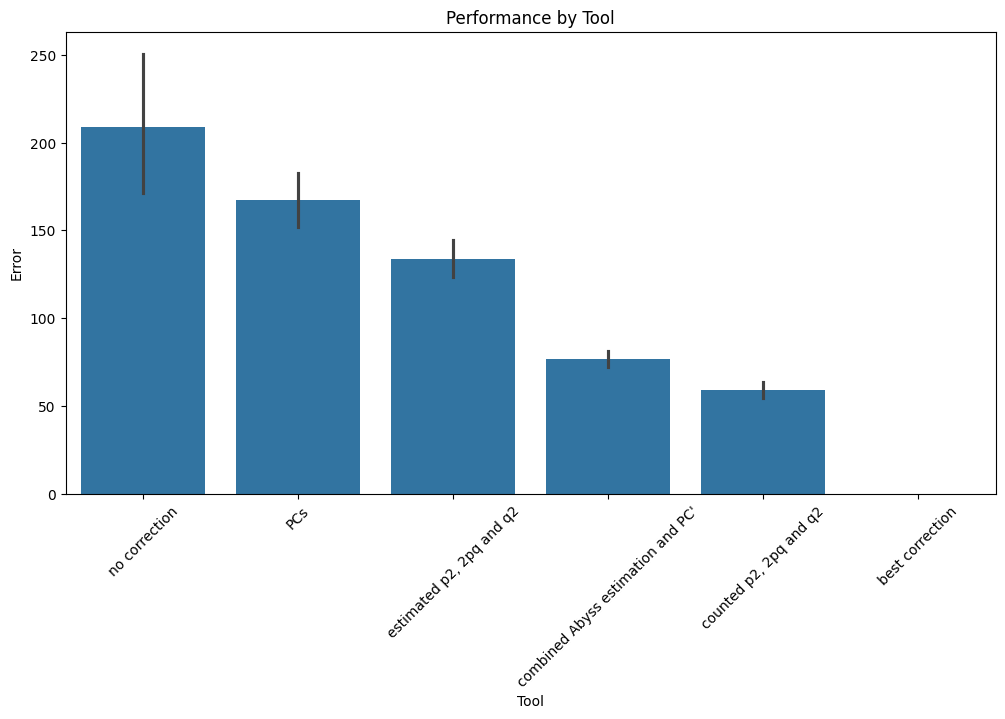

In [226]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

to_use = df.copy()
# Assuming your data is loaded into a DataFrame `df`
# Example DataFrame loading
# df = pd.read_csv('your_data.csv')

# Bar plot of performance (`perf`) by tool
plt.figure(figsize=(12, 6))
sns.barplot(x='tool', y='perf', data=to_use, estimator=sum, order=sorting_df(to_use, 'tool', 'perf'))

plt.title('Performance by Tool')
plt.ylabel('Error')
plt.xlabel('Tool')
plt.xticks(rotation=45)
plt.show()

tool
PCs                                  0.696779
best correction                      0.000000
combined Abyss estimation and PC'    0.320067
counted p2, 2pq and q2               0.246170
estimated p2, 2pq and q2             0.557101
no correction                        0.870315
Name: perf, dtype: float64
causal_noise
0.01    0.434887
0.9     0.461923
Name: perf, dtype: float64


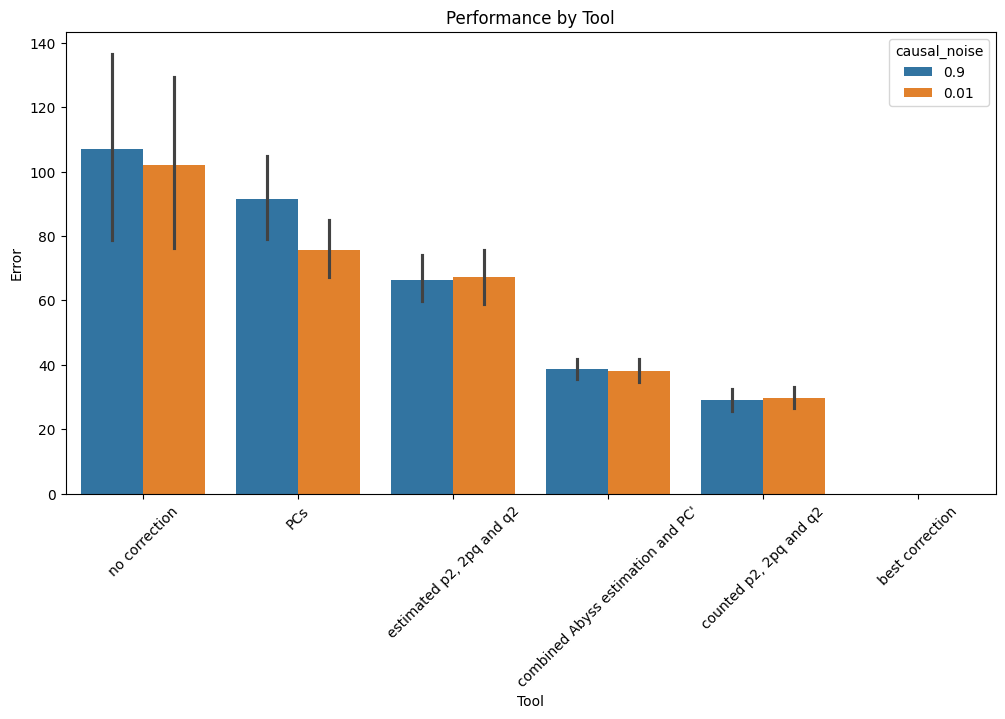

In [227]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

to_use = df.copy()
# Assuming your data is loaded into a DataFrame `df`
# Example DataFrame loading
# df = pd.read_csv('your_data.csv')

# Bar plot of performance (`perf`) by tool
plt.figure(figsize=(12, 6))
sns.barplot(x='tool', y='perf', data=to_use, estimator=sum, order=sorting_df(to_use, 'tool', 'perf'), hue = 'causal_noise',hue_order=sorting_df(to_use, 'causal_noise', 'perf'))

plt.title('Performance by Tool')
plt.ylabel('Error')
plt.xlabel('Tool')
plt.xticks(rotation=45)
plt.show()

tool
PCs                                  0.696779
best correction                      0.000000
combined Abyss estimation and PC'    0.320067
counted p2, 2pq and q2               0.246170
estimated p2, 2pq and q2             0.557101
no correction                        0.870315
Name: perf, dtype: float64
risk
Three localized Risks    0.418489
Tiny square risk         0.484755
Two tiny risks           0.441972
Name: perf, dtype: float64


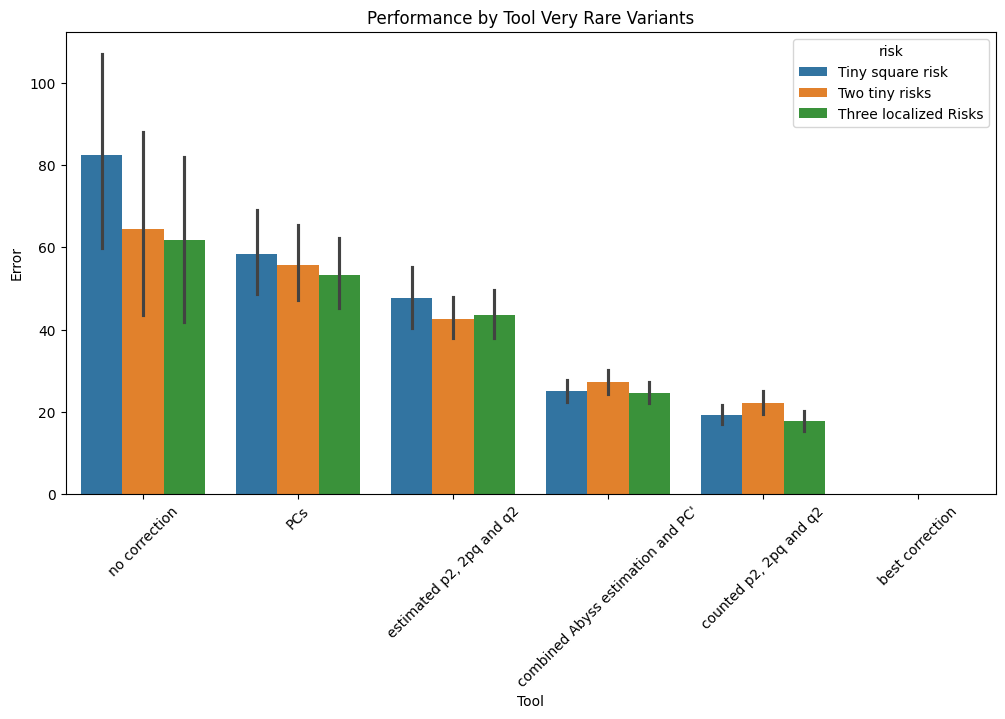

In [228]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

to_use = df.copy()
# Assuming your data is loaded into a DataFrame `df`
# Example DataFrame loading
# df = pd.read_csv('your_data.csv')

# Bar plot of performance (`perf`) by tool
plt.figure(figsize=(12, 6))
sns.barplot(x='tool', y='perf', data=to_use, estimator=sum, order=sorting_df(to_use, 'tool', 'perf'), hue = 'risk',hue_order=sorting_df(to_use, 'risk', 'perf'))

plt.title('Performance by Tool Very Rare Variants')
plt.ylabel('Error')
plt.xlabel('Tool')
plt.xticks(rotation=45)
plt.show()

tool
PCs                                  0.696779
best correction                      0.000000
combined Abyss estimation and PC'    0.320067
counted p2, 2pq and q2               0.246170
estimated p2, 2pq and q2             0.557101
no correction                        0.870315
Name: perf, dtype: float64
AFs
0.1    0.384126
0.2    0.556406
0.3    0.538237
0.4    0.429227
0.5    0.334030
Name: perf, dtype: float64


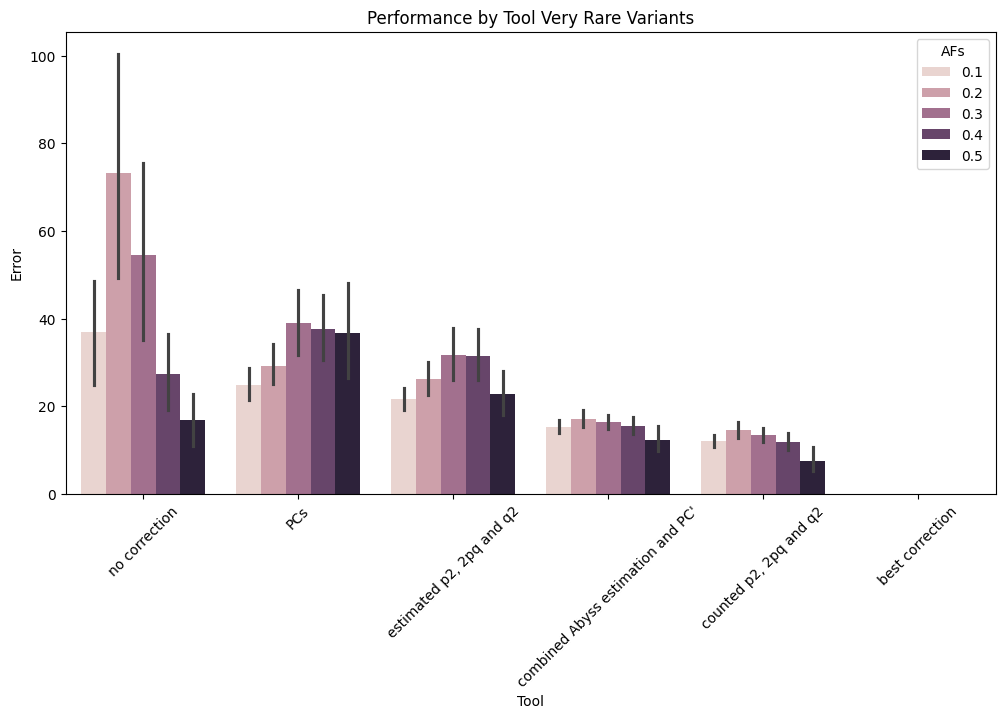

In [229]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

to_use = df.copy()
# Assuming your data is loaded into a DataFrame `df`
# Example DataFrame loading
# df = pd.read_csv('your_data.csv')

# Bar plot of performance (`perf`) by tool
plt.figure(figsize=(12, 6))
sns.barplot(x='tool', y='perf', data=to_use, estimator=sum, order=sorting_df(to_use, 'tool', 'perf'), hue = 'AFs',hue_order=sorting_df(to_use, 'AFs', 'perf'))

plt.title('Performance by Tool Very Rare Variants')
plt.ylabel('Error')
plt.xlabel('Tool')
plt.xticks(rotation=45)
plt.show()